<a href="https://colab.research.google.com/github/yifengjin89/yifengjin89-AI_assingment_3_Machine-Learning-in-Action/blob/main/Yifeng_Jin_assignment_3_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart failure is a serious condition, and usually there’s no cure. Heart failure may be close to us, but we all ignore it. My friend's cousin just pass away by heart failure in a few month ago, and there was no specific symptoms of it. So I found Heart Failure Prediction dataset, which included 12 clinical features for predicting death events. I will use a nerual network to predict death events and use random forest to select top 5 important features to predict it again.

In [1]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [2]:
# load the data
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [3]:
# store the data into a data frame
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Data Explanation

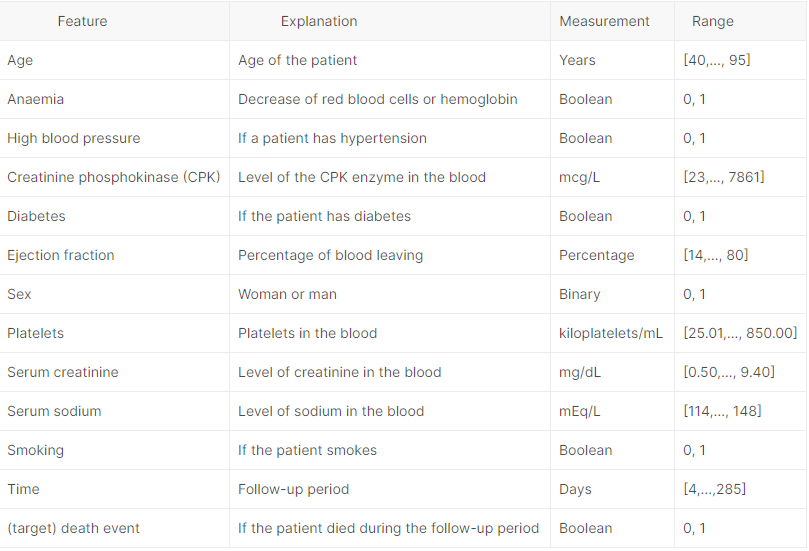

In [4]:
# check the data if has Na data
dataset.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# check for duplicates and remove
dataset.drop_duplicates(inplace= True)

Since I am gonna use a neural network to predicit death events. So I have to convert the data into correct datatype, then separate features into numerical group and catigorical group. Next, use a MinMaxScaler to scale the data for the nerual network.

In [6]:
# convert the data into correct datatype
dataset['anaemia'] = dataset['anaemia'].astype('category')
dataset['diabetes'] = dataset['diabetes'].astype('category')
dataset['high_blood_pressure'] = dataset['high_blood_pressure'].astype('category')
dataset['sex'] = dataset['sex'].astype('category')
dataset['smoking'] = dataset['smoking'].astype('category')

In [7]:
# display data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(5), float64(3), int64(5)
memory usage:

In [8]:
#Separate features into numerical group and catigorical group
num_data = dataset.select_dtypes(include=[np.number])
del num_data['DEATH_EVENT']


cat_data = dataset.select_dtypes(exclude=[np.number])

# Idenity the predited value
df = dataset.values
y = df[:, 12]
print ("There are {} numeric and {} categorical columns in data. The predicted value is DEATH_EVENT".format(num_data.shape[1],cat_data.shape[1]))
y

There are 7 numeric and 5 categorical columns in data. The predicted value is DEATH_EVENT


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [9]:
# display numeric data 
dataset.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


In [10]:
# Process the numeric data
from sklearn import  preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_num_scale = min_max_scaler.fit_transform(num_data)
X_num_scale

array([[0.63636364, 0.07131921, 0.09090909, ..., 0.15730337, 0.48571429,
        0.        ],
       [0.27272727, 1.        , 0.36363636, ..., 0.06741573, 0.65714286,
        0.00711744],
       [0.45454545, 0.01569278, 0.09090909, ..., 0.08988764, 0.45714286,
        0.01067616],
       ...,
       [0.09090909, 0.25988773, 0.6969697 , ..., 0.03370787, 0.71428571,
        0.97508897],
       [0.09090909, 0.30492473, 0.36363636, ..., 0.1011236 , 0.77142857,
        0.98220641],
       [0.18181818, 0.02207196, 0.46969697, ..., 0.12359551, 0.65714286,
        1.        ]])

In [11]:
X_scale = pd.concat([pd.DataFrame(X_num_scale),cat_data],axis = 1)
X_scale.shape

(299, 12)

In [12]:
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 4)
y_test

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1.])

In the neural network, I am using two hidden layers of 12 and 15 neurons respectively. The input shape will be 12 (features) and output will be 1.

In [13]:
# build the model
model = Sequential([
        Dense(12, activation='relu', input_shape=(12,)),
        Dense(15, activation='relu'),
        Dense(1, activation='sigmoid')                   
]    
)

In [14]:
# compile the model
model.compile(
      optimizer = 'sgd',
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
)

In [15]:
# Train the model, set 1000 epochs and break up data into 20% validation dataset.
hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 1s 104ms/step - loss: 0.7079 - accuracy: 0.3940 - val_loss: 0.6880 - val_accuracy: 0.4792
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.7119 - accuracy: 0.4233 - val_loss: 0.6816 - val_accuracy: 0.5208
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.7007 - accuracy: 0.5151 - val_loss: 0.6755 - val_accuracy: 0.5625
Epoch 4/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6897 - accuracy: 0.5456 - val_loss: 0.6700 - val_accuracy: 0.6042
Epoch 5/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.6174 - val_loss: 0.6651 - val_accuracy: 0.6875
Epoch 6/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6789 - accuracy: 0.5772 - val_loss: 0.6608 - val_accuracy: 0.7083
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.6773 - accuracy: 0.5928 - val_loss: 0.6570 - val_accuracy: 0.7500
Epoch 8/1000
6

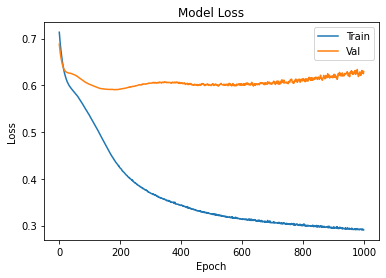

In [16]:
# visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

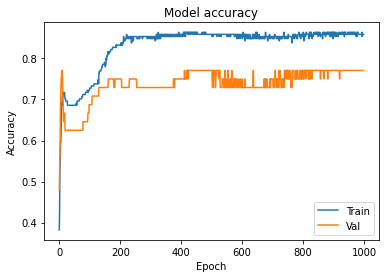

In [17]:
# visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [18]:
# make a prediction and print the actual values
prediction = model.predict(X_test)
prediction = [1 if y >= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


In [19]:
# evaluate the model on the training data
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       161
         1.0       0.81      0.69      0.74        78

    accuracy                           0.85       239
   macro avg       0.83      0.81      0.82       239
weighted avg       0.84      0.85      0.84       239

Confusion Matrix: 
 [[148  13]
 [ 24  54]]

Accuracy:  0.8451882845188284


After 1000 epochs the neural network will be trained. We can see that the training accuracy is reached 84.5%.

In [20]:
# evaluate the model on the test data
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        42
         1.0       0.82      0.50      0.62        18

    accuracy                           0.82        60
   macro avg       0.82      0.73      0.75        60
weighted avg       0.82      0.82      0.80        60

Confusion Matrix: 
 [[40  2]
 [ 9  9]]

Accuracy:  0.8166666666666667


We can see that the model's performance on the test data is not bad, the accuracy is reached 81.6%, but I want to make it better. So I am gonna use random forest to choose top 5 important features, then predict it again. Let's see what gonna happen.

In [21]:
# use Random forest to select important features
# Create a random forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 4)
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

# Train the classifier
rf.fit(X_train, y_train)

# Print the name and gini importance of each feature
rf.feature_importances_
feat_label = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','anaemia','diabetes','high_blood_pressure','sex','smoking']

for feature in zip(feat_label, rf.feature_importances_):
    print(feature)

('age', 0.0952320559650102)
('creatinine_phosphokinase', 0.0816989272449362)
('ejection_fraction', 0.11926093309205274)
('platelets', 0.07414341108168321)
('serum_creatinine', 0.14198751381703306)
('serum_sodium', 0.07524342086922703)
('time', 0.3516852867085501)
('anaemia', 0.012882395603792984)
('diabetes', 0.012169047319983558)
('high_blood_pressure', 0.011930261461692192)
('sex', 0.011253927855970534)
('smoking', 0.012512818980068232)


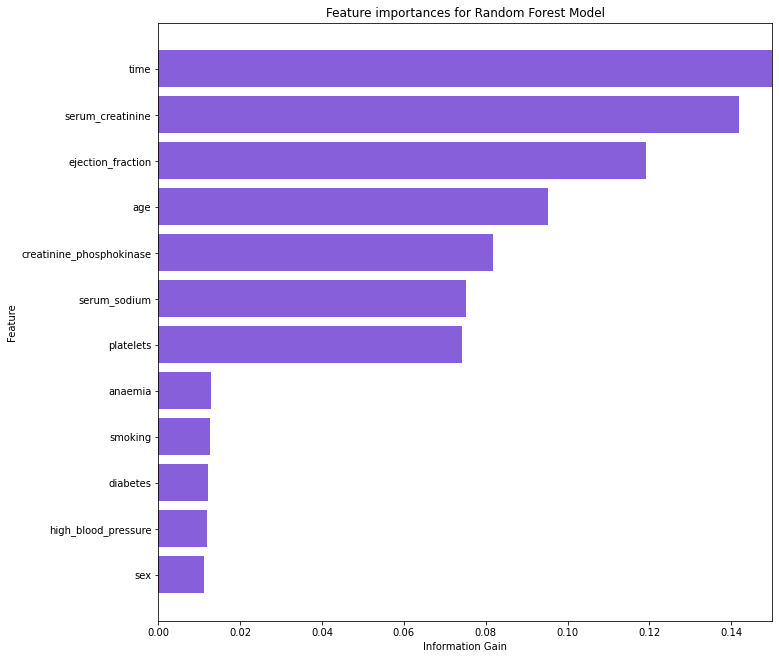

In [22]:
#Plot Feature Importance in RandomForest Model
importancesRF = rf.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]

Header = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','anaemia','diabetes','high_blood_pressure','sex','smoking']
n = len(Header)

# Sort by Decreasing order
indRf = sorted(importancesRF) 
index = np.arange(n)

feature_space = []
for i in range(n-1, -1, -1):
    feature_space.append(Header[indicesRF[i]])

f, ax = plt.subplots(figsize=(11, 11))
plt.title('Feature importances for Random Forest Model')
plt.barh(index, indRf,
        align="center", 
        color = '#875FDB')

plt.yticks(index, feature_space)
plt.ylim(-1, n)
plt.xlim(0, 0.15)
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.show()

Now we know that the top 5 important features are: 'time','serum_creatinine','ejection_fraction','age','creatinine_phosphokinase'. The next step is to construct a new dataset with top 5 important features and use a neural network to predicit death events again. 

In [23]:
# Consturct a new dataset with only the top 5 important featrues
new_dataset = dataset.filter(['time','serum_creatinine','ejection_fraction','age','creatinine_phosphokinase','DEATH_EVENT'], axis=1)
new_dataset

,time,serum_creatinine,ejection_fraction,age,creatinine_phosphokinase,DEATH_EVENT
0,4,1.9,20,75.0,582,1
1,6,1.1,38,55.0,7861,1
2,7,1.3,20,65.0,146,1
3,7,1.9,20,50.0,111,1
4,8,2.7,20,65.0,160,1
...,...,...,...,...,...,...
294,270,1.1,38,62.0,61,0
295,271,1.2,38,55.0,1820,0
296,278,0.8,60,45.0,2060,0
297,280,1.4,38,45.0,2413,0


In [24]:
# convert the data into an arrray
df = new_dataset.values
df

array([[4.000e+00, 1.900e+00, 2.000e+01, 7.500e+01, 5.820e+02, 1.000e+00],
       [6.000e+00, 1.100e+00, 3.800e+01, 5.500e+01, 7.861e+03, 1.000e+00],
       [7.000e+00, 1.300e+00, 2.000e+01, 6.500e+01, 1.460e+02, 1.000e+00],
       ...,
       [2.780e+02, 8.000e-01, 6.000e+01, 4.500e+01, 2.060e+03, 0.000e+00],
       [2.800e+02, 1.400e+00, 3.800e+01, 4.500e+01, 2.413e+03, 0.000e+00],
       [2.850e+02, 1.600e+00, 4.500e+01, 5.000e+01, 1.960e+02, 0.000e+00]])

In [25]:
# get all of the rows from the first 5 columns of the dataset
X = df[:, 0:5]
y = df[:, 5]

In [26]:
# Process the data
from sklearn import  preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        , 0.15730337, 0.09090909, 0.63636364, 0.07131921],
       [0.00711744, 0.06741573, 0.36363636, 0.27272727, 1.        ],
       [0.01067616, 0.08988764, 0.09090909, 0.45454545, 0.01569278],
       ...,
       [0.97508897, 0.03370787, 0.6969697 , 0.09090909, 0.25988773],
       [0.98220641, 0.1011236 , 0.36363636, 0.09090909, 0.30492473],
       [1.        , 0.12359551, 0.46969697, 0.18181818, 0.02207196]])

In [27]:
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 4)
y_test

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1.])

Using two hidden layers of 5 and 8 neurons respectively. The input shape will be 5 (features) and output will be 1.

In [28]:
# build the model
model = Sequential([
        Dense(5, activation='relu', input_shape=(5,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')                   
]    
)

In [29]:
# compile the model
model.compile(
      optimizer = 'sgd',
      loss = 'binary_crossentropy',
      metrics = ['accuracy']
)

In [30]:
# Train the model, set 1000 epochs and break up our data into 20% validation dataset.
hist = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 1s 43ms/step - loss: 0.6912 - accuracy: 0.5835 - val_loss: 0.6915 - val_accuracy: 0.6250
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.7421 - val_loss: 0.6888 - val_accuracy: 0.6458
Epoch 3/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6840 - accuracy: 0.6905 - val_loss: 0.6860 - val_accuracy: 0.6250
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6789 - accuracy: 0.7214 - val_loss: 0.6833 - val_accuracy: 0.6250
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6764 - accuracy: 0.6774 - val_loss: 0.6807 - val_accuracy: 0.6250
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6791 - val_loss: 0.6782 - val_accuracy: 0.6250
Epoch 7/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.6715 - accuracy: 0.6609 - val_loss: 0.6758 - val_accuracy: 0.6250
Epoch 8/1000
6/6 

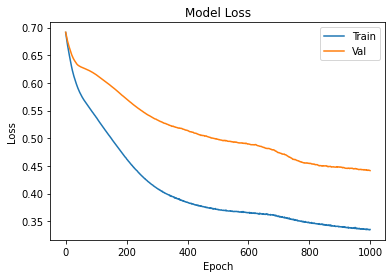

In [31]:
# visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

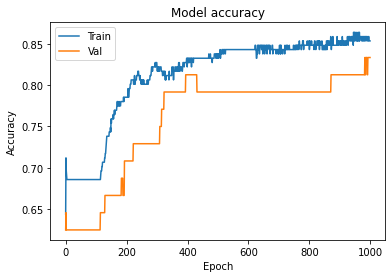

In [32]:
# visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [33]:
# make a prediction and print the actual values
prediction = model.predict(X_test)
prediction = [1 if y >= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]
[1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.]


In [34]:
# evaluate the model on the training data
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       161
         1.0       0.83      0.68      0.75        78

    accuracy                           0.85       239
   macro avg       0.84      0.81      0.82       239
weighted avg       0.85      0.85      0.85       239

Confusion Matrix: 
 [[150  11]
 [ 25  53]]

Accuracy:  0.8493723849372385


After 1000 epochs the neural network will be trained. We can see that the training accuracy is reached 84.9%.

In [35]:
# evaluate the model on the test data
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        42
         1.0       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60

Confusion Matrix: 
 [[39  3]
 [ 5 13]]

Accuracy:  0.8666666666666667


The model's performance looks good, and the accuracy has been increased to 86.7%, but for anything dealing with people in their lives and medical issues, we really want to the score to be much higher than this report. So may be we can  drop out some columns and/ or add some columns and/ or only keep importmant features in our model to possbily make it better.